# 1. Stock price process

Please see Note (section 3) for theory part. The discrete-time model implies:

$$\frac{\Delta S}{S} =\mu\Delta t+\sigma\epsilon\sqrt{\Delta t}$$

So if we assume that $\mu=15%$, $\sigma=0.3$, time interval is one week so $\Delta t=\frac{1}{52}=0.0192$ then:

$$\Delta S = 0.00288S+0.0416S\epsilon$$

On March 6, I visited the Yahoo Finance and see that the close price of MSFT is 161.57 (e.g., $S=161.57$). Now, I will draw a simple simulation to see how is the stock price in the next 5 weeks.

Remind that we can get the random standard normal distribution from `np.random.randn`:

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
T = 5
e = npr.randn(T)
e

array([-0.24666271,  0.38302848,  1.06368229,  1.27017287, -0.38398946])

In [4]:
S0 = 161.57
dS = 0.00288*S0 +0.0416*S0*e
dS

array([-1.19257543,  3.03977553,  7.61466215,  9.00254978, -2.11559139])

In [5]:
ST = S0 + np.cumsum(dS)

In [6]:
ST

array([160.37742457, 163.4172001 , 171.03186225, 180.03441203,
       177.91882064])

Actually, we care about the last prediction only to answer for the question: "What is the predicted price of MSFT in the next 5 weeks?"

In [7]:
ST[-1]

177.91882064157625

But if we randomly do this for one time, the result may be unreliable. How about we simulate it for, say, 10,000 times.

In [8]:
def predictPrice(S0 = 161.57, T = 5):
    """
    S0: initial stock price
    T: how many weeks ahead to predict
    """
    import numpy as np
    import numpy.random as npr
    e = npr.randn(T)
    dS = 0.00288*S0 +0.0416*S0*e
    ST = S0 + np.cumsum(dS)
    return ST[-1]

In [9]:
predictPrice()

170.1067490403072

In [10]:
predictPrice()

142.03439905867572

In [11]:
predictPrice()

168.4381224438278

See that the function returns different prediction each time. Now do it for 10,000 times:

In [12]:
Price = []
for i in range(10000):
    Price.append(predictPrice())

In [13]:
Price[:10]

[188.35868723784833,
 157.89833693162547,
 164.50162576479977,
 150.2693361370764,
 167.47177964772493,
 171.50095672617672,
 162.66073469819779,
 165.23248381186457,
 160.14372559053663,
 160.26950642171604]

(array([5.200e+01, 3.770e+02, 1.372e+03, 2.789e+03, 3.071e+03, 1.725e+03,
        5.330e+02, 7.400e+01, 6.000e+00, 1.000e+00]),
 array([112.68676832, 125.1141438 , 137.54151929, 149.96889477,
        162.39627025, 174.82364574, 187.25102122, 199.67839671,
        212.10577219, 224.53314767, 236.96052316]),
 <a list of 10 Patch objects>)

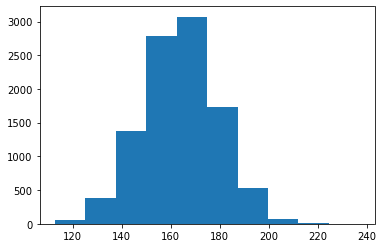

In [14]:
plt.hist(Price)

# 2. How to draw the price process?

Someone may prefer the whole price process in a long term, rather than a point prediction as above. Thus, we modify the function a bit.

In [15]:
def predictPriceProcess(S0 = 161.57, T = 5):
    """
    S0: initial stock price
    T: how many weeks ahead to predict
    """
    import numpy as np
    import numpy.random as npr
    e = npr.randn(T)
    dS = 0.00288*S0 +0.0416*S0*e
    ST = S0 + np.cumsum(dS)
    ST = np.insert(ST, 0, S0) # I put the initial price to price process too
    return ST

In [16]:
predictPriceProcess(T=20)

array([161.57      , 173.62572838, 164.89077823, 159.35081285,
       157.97373289, 167.8185677 , 176.65626843, 178.75385006,
       183.37580917, 185.487809  , 183.07590446, 181.67715855,
       189.75984026, 205.45071686, 206.4741706 , 210.80002917,
       205.04402232, 198.8544282 , 195.3571077 , 190.48564504,
       194.88050497])

In [17]:
predictPriceProcess(T=20)

array([161.57      , 158.4882429 , 163.737107  , 166.30037822,
       165.9901994 , 175.4628175 , 177.38581094, 182.18288988,
       166.94152211, 152.89592885, 147.29037078, 153.96992144,
       159.63689063, 155.45786448, 165.36306177, 173.13755179,
       166.0244501 , 154.20749221, 145.87698817, 151.60593378,
       157.08401751])

Repeat it 10,000 times and save data as a `Dataframe`:

In [18]:
import pandas as pd

In [19]:
T = 20 # next 20 weeks
StockPriceDf = pd.DataFrame(
    {'week': range(1, T+1)}
)
StockPriceDf.head()

,week
0,1
1,2
2,3
3,4
4,5


In [20]:
for i in range(10):
    onePriceProcess = pd.Series(predictPriceProcess(T=T))
    StockPriceDf = pd.concat([StockPriceDf, onePriceProcess], axis=1)
StockPriceDf.head()

,week,0,0,0,0,0,0,0,0,0,0
0,1.0,161.570000,161.570000,161.570000,161.570000,161.570000,161.570000,161.570000,161.570000,161.570000,161.570000
1,2.0,156.853051,170.509465,155.611652,156.499067,155.647625,159.390817,164.374403,148.128240,159.687911,174.788998
2,3.0,167.521086,171.081688,146.337403,159.289561,151.507949,162.074924,160.709653,139.360358,147.013189,175.532891
3,4.0,170.811454,171.600684,152.699683,163.146097,152.916227,163.304218,155.214014,141.930127,148.702758,179.352738
4,5.0,171.992886,172.641784,154.261871,160.016440,164.397720,164.358054,159.615004,131.906401,155.825337,175.263033


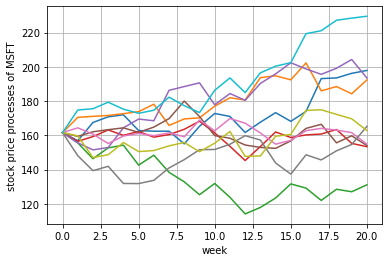

In [21]:
plt.plot(StockPriceDf.iloc[:, 1:11], lw=1.5)
plt.xlabel('week')
plt.ylabel('stock price processes of MSFT')
plt.grid(True)